# This is just a kidding while try to mine correlations for a good stock market price prediction code.

### In this case I'll do it with PETR4

In [2]:
import requests,ast
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime,date, timedelta

### Getting historical data of this PETR4 ticket  

In [4]:
ticket = 'PETR4'

# getting the data
_url = 'https://br.advfn.com/common/bov-options/api?symbol={}'.format(ticket)
end_date = (date.today() + timedelta(days=-2)).strftime('%m-%d-%Y')
start_date = (date.today()+timedelta(days=-92)).strftime('%m-%d-%Y')
df_tck = pdr.DataReader('{}.SA'.format(ticket), data_source='yahoo', start=start_date, end=end_date)

# data treatment
df_tck['Date'] = df_tck.index.values
df_tck['VolumeAboveMean'] = df_tck['Volume'].mean() + df_tck['Volume'].std()
df_tck['PriceDailyMean'] = (df_tck['High'] + df_tck['Low'])/2

# showing general info
df_tck.describe()

,High,Low,Open,Close,Volume,Adj Close,VolumeAboveMean,PriceDailyMean
count,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,6.200000e+01,62.000000
mean,24.886936,24.213065,24.511452,24.571129,7.242902e+07,24.261222,1.033192e+08,24.550000
std,1.511636,1.540584,1.523989,1.560934,3.089021e+07,1.784313,3.004561e-08,1.520321
min,22.340000,21.580000,21.940001,22.340000,3.328100e+07,21.612612,1.033192e+08,21.960000
25%,23.857500,23.135001,23.485000,23.545001,5.022300e+07,23.054096,1.033192e+08,23.555000
50%,24.215000,23.630000,23.950000,23.955000,6.528390e+07,23.588583,1.033192e+08,23.910000
75%,26.232500,25.625000,25.837500,25.892500,8.196700e+07,25.892500,1.033192e+08,25.952499
max,28.799999,28.010000,28.500000,28.660000,1.965191e+08,28.660000,1.033192e+08,28.379999


### Plotting a graph of max-min prices with volume below

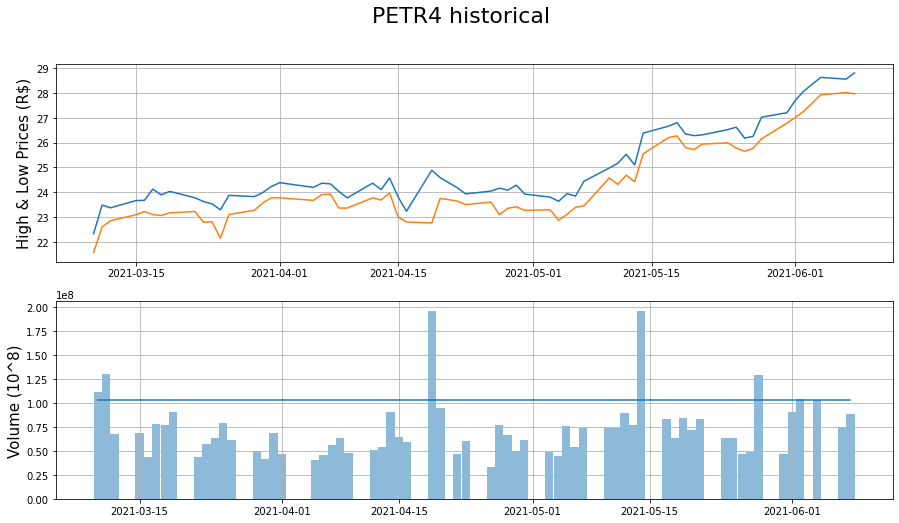

In [38]:
x = df_tck.index.to_numpy()
y = df_tck['Volume'].to_numpy()

fig, axs = plt.subplots(2, figsize=(15,8))
fig.suptitle('PETR4 historical',fontsize=22)

# graph of max and min
axs[0].plot(df_tck[['High','Low']])
axs[0].set_ylabel('High & Low Prices (R$)',fontsize=15)

# graph of volume with a line t
axs[1].bar(x, y, width=0.99, alpha=0.5)
axs[1].set_ylabel('Volume (10^8)',fontsize=15)
axs[1].plot(df_tck['VolumeAboveMean'])

axs[0].grid(True)
axs[1].grid(True)

plt.show()

In [7]:
df_criticaldays = df_tck.loc[ df_tck['Volume']>df_tck['VolumeAboveMean']].copy()
list_criticaldays = df_criticaldays['Date'].to_numpy()
print('The volume above the mean starts in {:,.0f} and the max is {:,.0f}'.format(df_tck.iloc[0]['VolumeAboveMean'], df_tck.describe()['Volume']['max']))
df_criticaldays = (df_tck.loc[df_tck['Volume'] > df_tck['VolumeAboveMean']]).copy()
df_criticaldays['Difference'] = df_criticaldays['High']-df_criticaldays['Low']
df_criticaldays[['Low','High','Difference','Volume']]

The volume above the mean starts in 103,319,229 and the max is 196,519,100


,Low,High,Difference,Volume
Date,,,,
2021-03-10,21.580000,22.340000,0.760000,111744100.0
2021-03-11,22.610001,23.490000,0.879999,130577500.0
2021-04-19,22.770000,24.889999,2.119999,196519100.0
2021-05-14,25.549999,26.379999,0.830000,196135500.0
2021-05-28,26.150000,27.020000,0.870001,129526400.0
2021-06-02,27.260000,28.070000,0.809999,103985100.0


In [24]:
# request and creation of dataframe
    response = requests.get(_url)
    dic_opt = ast.literal_eval(response.text)
    df_opt = pd.DataFrame(dic_opt['result'])

# cleaning our dataframe
    del df_opt['class']
    del df_opt['url']
    del df_opt['volume_form']
    df_opt['strike_price'] = df_opt['strike_price'].apply(lambda x: x.replace(',','.')).astype(float)
    df_opt['expiry_date'] = df_opt['expiry_date'].apply(lambda x: x.replace('\\',''))
    df_opt['expiry_date'] = pd.to_datetime(df_opt['expiry_date'], format='%d/%m/%Y')
    df_opt['volume'] = pd.to_numeric(df_opt['volume'])
    df_opt['change_percentage'] = df_opt['change_percentage'].apply(lambda x: x.replace(',','.').replace('%','')).astype(float)/100

# showing results to CALL with Volume > 0
    df_opt_calls = df_opt.loc[(df_opt['type']=='Call')&(df_opt['volume']>0)].sort_values(by=['volume'], ascending=False)
    df_opt_puts = df_opt.loc[(df_opt['type']=='Put')&(df_opt['volume']>0)].sort_values(by=['volume'], ascending=False)
    df_opt_calls

,symbol,type,style,strike_price,expiry_date,volume,change_percentage
0,PETRF296,Call,A,28.96,2021-06-18,21172500.0,-0.0976
1,PETRF306,Call,A,29.96,2021-06-18,19577900.0,-0.1667
2,PETRF294,Call,A,30.46,2021-06-18,13057300.0,-0.3333
3,PETRF286,Call,A,28.46,2021-06-18,10735800.0,-0.0597
5,PETRF299,Call,E,29.21,2021-06-18,7910700.0,-0.1613
...,...,...,...,...,...,...,...
101,PETRF211,Call,E,21.71,2021-06-18,1700.0,-0.0231
102,PETRF356,Call,A,34.96,2021-06-18,1000.0,0.0000
105,PETRF166,Call,A,20.96,2021-06-18,300.0,0.0344
106,PETRF88,Call,E,11.71,2021-06-18,300.0,0.1667


In [29]:
df_volsum = df_opt['volume'].sum()
df_volsum_type = df_opt.groupby(['type'], sort=False)['volume'].sum()
df_volsum_type

type
Call    117362600.0
Put      41957800.0
Name: volume, dtype: float64

In [35]:
df_opt['Expectation on type'] = np.where(df_opt['type']=='Call', df_opt['volume']/df_volsum_type['Call'], df_opt['volume']/df_volsum_type['Put'])

In [36]:
df_opt['General Expectation'] = df_opt['volume']/df_volsum
df_opt.loc[df_opt['volume']>0]

,symbol,type,style,strike_price,expiry_date,volume,change_percentage,Expectation on type,General Expectation
0,PETRF296,Call,A,28.96,2021-06-18,21172500.0,-0.0976,1.804024e-01,1.328926e-01
1,PETRF306,Call,A,29.96,2021-06-18,19577900.0,-0.1667,1.668155e-01,1.228838e-01
2,PETRF294,Call,A,30.46,2021-06-18,13057300.0,-0.3333,1.112561e-01,8.195623e-02
3,PETRF286,Call,A,28.46,2021-06-18,10735800.0,-0.0597,9.147548e-02,6.738497e-02
4,PETRR296,Put,E,28.96,2021-06-18,8606200.0,-0.0156,2.051156e-01,5.401819e-02
...,...,...,...,...,...,...,...,...,...
107,PETRR211,Put,E,21.71,2021-06-18,300.0,0.0000,7.150041e-06,1.882998e-06
108,PETRR349,Put,E,34.21,2021-06-18,200.0,-0.0273,4.766694e-06,1.255332e-06
109,PETRR188,Put,E,18.21,2021-06-18,100.0,0.0000,2.383347e-06,6.276660e-07
110,PETRR341,Put,E,33.46,2021-06-18,100.0,-0.4167,2.383347e-06,6.276660e-07


In [37]:
df_opt.groupby(['type'], sort=False)['General Expectation'].sum()

type
Call    0.736645
Put     0.263355
Name: General Expectation, dtype: float64